# Оптимальные портфели инвестиций. Италия 2016г.

#### Порхаев Виталий, Клыков Георгий, 22ПМИ-1

#### 1 задание. Portfolio with minimal risk
Выбраны 50 случайных активов из различных сфер. Реализуем задачу нахождения портфеля с минимальным риском с двумя условиями: с разрешением коротких продаж и с их запретом. Отличия в ограничениях на веса - при запрете на короткие продаже они не могут быть отрицательными

In [222]:
import pandas as pd
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt

In [223]:
data = pd.read_csv('stocks_2.csv')
data = data.iloc[:, 1:]
data

,Date,PST,INWT,ITPG,RACE,STLAM,AZMT,ISP,DIAS,LDOF,...,LDO,TEN,G,MB,PQ,SU,ITT,UL,ATL,FIMI
0,04.01.2016,6.965,4.964,14.06,43.67,5.877,21.755,2.982,48.18,12.37,...,11.187449,8.301977,9.301225,5.543302,1.020504,66.129967,38.570,40.700000,22.26,1.409
1,05.01.2016,7.200,5.020,14.27,44.59,6.032,21.508,3.040,49.09,12.86,...,11.630607,8.317351,9.398831,5.536849,1.051566,66.129967,38.420,40.520000,22.39,1.416
2,06.01.2016,7.090,5.010,13.92,44.60,5.718,21.065,2.958,48.80,12.56,...,11.359287,8.117489,9.220844,5.398105,1.036414,66.129967,38.400,40.270000,22.33,1.420
3,07.01.2016,7.050,5.030,13.23,43.15,5.531,20.473,2.908,48.67,12.55,...,11.350244,7.886879,9.203620,5.294854,1.034141,66.129967,39.550,40.520000,22.61,1.420
4,08.01.2016,6.985,5.035,12.93,40.54,5.304,19.911,2.898,48.55,12.38,...,11.196494,7.587086,9.106014,5.165790,1.005352,66.129967,39.340,40.470000,22.67,1.385
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,23.12.2016,6.410,4.366,15.27,55.90,6.261,15.762,2.460,55.40,13.48,...,12.191337,13.525127,8.744328,5.341475,0.896741,54.166756,36.280,42.200000,23.16,2.150
252,27.12.2016,6.415,4.376,15.17,55.75,6.333,15.771,2.452,56.40,13.56,...,12.263689,13.684343,8.750412,5.338109,0.901448,54.374454,35.455,44.336825,23.41,2.140
253,28.12.2016,6.345,4.340,15.71,55.85,6.326,15.614,2.432,56.20,13.42,...,12.137072,13.708223,8.634796,5.270794,0.892818,54.374454,35.455,44.336825,23.75,2.202
254,29.12.2016,6.345,4.370,15.46,55.25,6.261,15.673,2.412,56.30,13.30,...,12.028544,13.509208,8.586115,5.230404,0.893602,54.374454,35.455,44.336825,24.20,2.260


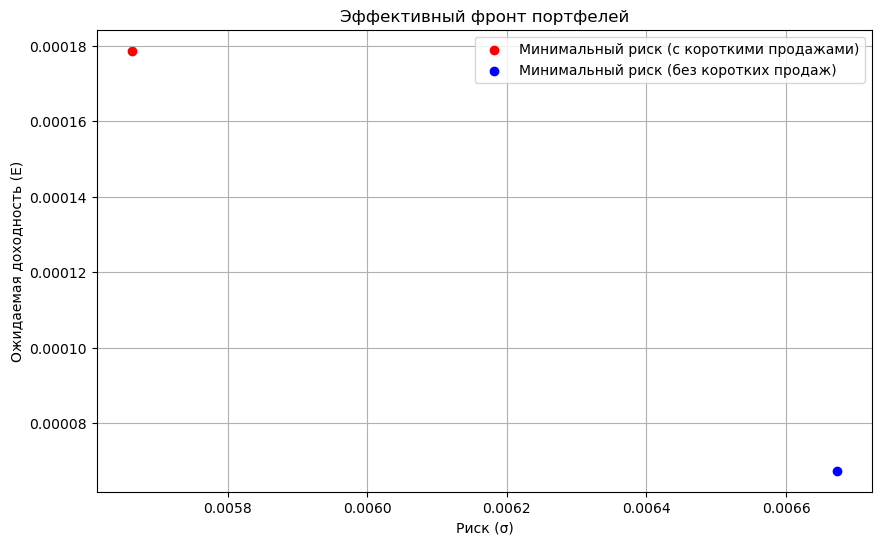

Минимальный риск с короткими продажами: риск = 0.005662861858411219 , ожидаемая доходность = 0.00017873110071450592
Минимальный риск без коротких продаж: риск = 0.006672600259179826 , ожидаемая доходность = 6.737226720127729e-05


In [234]:
log_returns = np.log(data.iloc[:, 1:] / data.iloc[:, 1:].shift(1))

expected_returns = log_returns.mean()
cov_matrix = log_returns.cov()

num_assets = len(expected_returns)

weights_short = cp.Variable(num_assets)
portfolio_risk_short = cp.quad_form(weights_short, cov_matrix)  
constraints_short = [cp.sum(weights_short) == 1]  
objective_short = cp.Minimize(portfolio_risk_short)
problem_short = cp.Problem(objective_short, constraints_short)
problem_short.solve()

weights_noshort = cp.Variable(num_assets)
portfolio_risk_noshort = cp.quad_form(weights_noshort, cov_matrix)
constraints_noshort = [cp.sum(weights_noshort) == 1, weights_noshort >= 0] 
objective_noshort = cp.Minimize(portfolio_risk_noshort)
problem_noshort = cp.Problem(objective_noshort, constraints_noshort)
problem_noshort.solve()

optimal_weights_short = weights_short.value
optimal_weights_noshort = weights_noshort.value

risk_short = np.sqrt(optimal_weights_short.T @ cov_matrix @ optimal_weights_short)
return_short = optimal_weights_short.T @ expected_returns

risk_noshort = np.sqrt(optimal_weights_noshort.T @ cov_matrix @ optimal_weights_noshort)
return_noshort = optimal_weights_noshort.T @ expected_returns

plt.figure(figsize=(10, 6))
plt.scatter(risk_short, return_short, c='red', label='Минимальный риск (с короткими продажами)')
plt.scatter(risk_noshort, return_noshort, c='blue', label='Минимальный риск (без коротких продаж)')
plt.title('Эффективный фронт портфелей')
plt.xlabel('Риск (σ)')
plt.ylabel('Ожидаемая доходность (E)')
plt.legend()
plt.grid()
plt.show()

print("Минимальный риск с короткими продажами: риск =", risk_short, ", ожидаемая доходность =", return_short)
print("Минимальный риск без коротких продаж: риск =", risk_noshort, ", ожидаемая доходность =", return_noshort)

Как можно заметить при меньшем риске большую доходность дает портфель с разрешением коротких продаж

#### 2 задание. Efficient frontier

Построим эффективный фронт портфелей инвестиций с разрешением коротких продаж и с запретом. Изобразим оба фронта и карту активов в системе координат (σ, E)

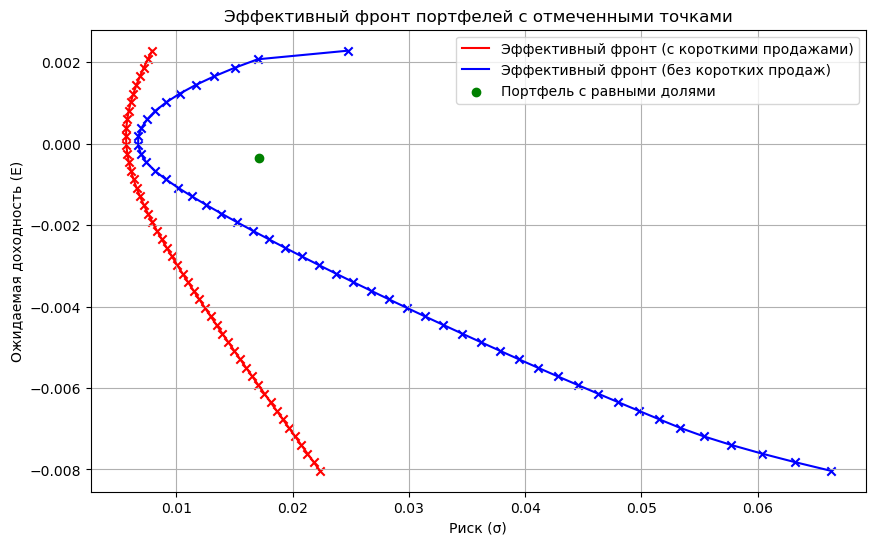

Портфель с равными долями: Риск = 0.01712308771426069 , Ожидаемая доходность = -0.00034977379113724496


In [225]:
num_portfolios = 50
target_returns = np.linspace(expected_returns.min(), expected_returns.max(), num_portfolios)

risk_short = []
returns_short = []
weights_short_list = []

for target_return in target_returns:
    weights_short = cp.Variable(num_assets)
    portfolio_risk_short = cp.quad_form(weights_short, cov_matrix)
    portfolio_return_short = weights_short.T @ expected_returns
    constraints_short = [cp.sum(weights_short) == 1, portfolio_return_short == target_return]
    problem_short = cp.Problem(cp.Minimize(portfolio_risk_short), constraints_short)
    problem_short.solve()

    risk_short.append(np.sqrt(portfolio_risk_short.value))
    returns_short.append(target_return)
    weights_short_list.append(weights_short.value)

risk_noshort = []
returns_noshort = []
weights_noshort_list = []

for target_return in target_returns:
    weights_noshort = cp.Variable(num_assets)
    portfolio_risk_noshort = cp.quad_form(weights_noshort, cov_matrix)
    portfolio_return_noshort = weights_noshort.T @ expected_returns
    constraints_noshort = [cp.sum(weights_noshort) == 1, weights_noshort >= 0, portfolio_return_noshort == target_return]
    problem_noshort = cp.Problem(cp.Minimize(portfolio_risk_noshort), constraints_noshort)
    problem_noshort.solve()

    risk_noshort.append(np.sqrt(portfolio_risk_noshort.value))
    returns_noshort.append(target_return)
    weights_noshort_list.append(weights_noshort.value)

equal_weights = np.ones(num_assets) / num_assets
equal_portfolio_return = equal_weights.T @ expected_returns
equal_portfolio_risk = np.sqrt(equal_weights.T @ cov_matrix @ equal_weights)

plt.figure(figsize=(10, 6))

plt.plot(risk_short, returns_short, label='Эффективный фронт (с короткими продажами)', color='red')
plt.scatter(risk_short, returns_short, color='red', marker='x') 

plt.plot(risk_noshort, returns_noshort, label='Эффективный фронт (без коротких продаж)', color='blue')
plt.scatter(risk_noshort, returns_noshort, color='blue', marker='x') 

plt.scatter(equal_portfolio_risk, equal_portfolio_return, color='green', marker='o', label='Портфель с равными долями')

plt.title('Эффективный фронт портфелей с отмеченными точками')
plt.xlabel('Риск (σ)')
plt.ylabel('Ожидаемая доходность (E)')
plt.legend()
plt.grid(True)
plt.show()

print("Портфель с равными долями: Риск =", equal_portfolio_risk, ", Ожидаемая доходность =", equal_portfolio_return)


Фронт с разрешением коротких продаж: этот фронт ограничен и находится ближе к вертикальной оси - возможность коротких продаж может позволить лучше управлять рисками. Видно, что портфели с короткими продажами могут достигать очень низкого риска, но за счет этого теряется доходность.
Фронт с запретом коротких продаж: этот фронт более растянут по горизонтальной оси. Запрет на короткие продажи ограничивает возможности хеджирования.
Портфель с равными долями вложений имеет риск и доходность, которые находятся далеко от обоих фронтов. Он характеризуется сравнительно высоким риском и низкой доходностью.
Портфели с запретом коротких продаж позволяют достичь высокой доходности, но сопровождаются большим риском, тогда как с короткими продажами портфели сосредоточены в зоне меньшего риска.

#### 3 задание. Portfolio selection problem

Построим «хорошие» инвестиционные портфели из 10 активов вместо исходных 50.
В нашем случае выбор 10 акций был сделан на основе наибольших значений коэффициента Шарпа. Это означает, что из 50 акций были выбраны те, которые предлагают наилучшую доходность на единицу риска, что делает их более предпочтительными для включения в портфель. Такой подход помогает сформировать портфель, который максимизирует ожидаемую доходность при минимизации риска. Выбранные 10 акций должны обеспечивать наилучшее соотношение доходности к риску по сравнению с остальными активами из набора в 50 акций.

$$
\text{Sharpe Ratio} = \frac{E[R] - R_f}{\sigma}
$$

E[R] — ожидаемая доходность актива или портфеля,
R_f  — безрисковая ставка доходности,
σ — стандартное отклонение доходностей

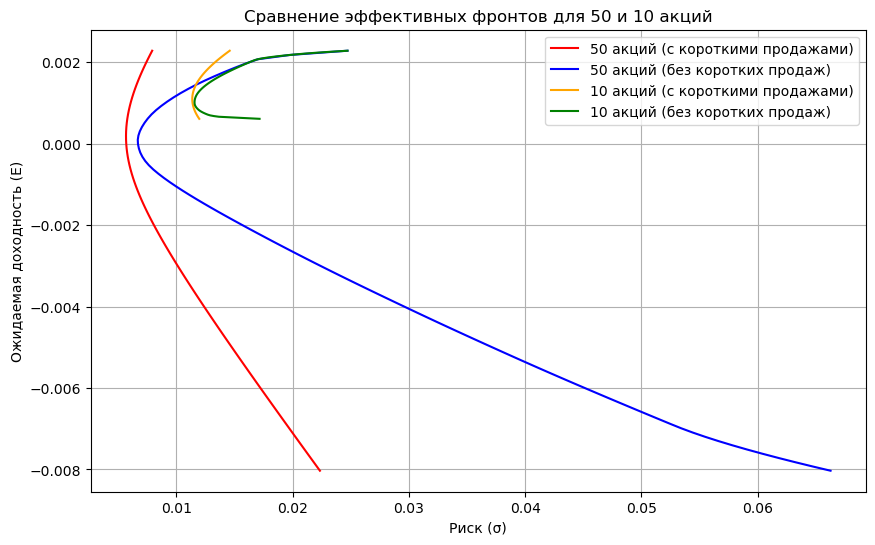

In [226]:
sharpe_ratios = expected_returns / np.sqrt(np.diag(cov_matrix))
top_10_indices = np.argsort(sharpe_ratios)[-10:] 

cov_matrix = np.array(cov_matrix)

selected_returns_10 = expected_returns[top_10_indices]
selected_cov_matrix_10 = cov_matrix[np.ix_(top_10_indices, top_10_indices)]

def efficient_frontier(expected_returns, cov_matrix, num_portfolios=100, allow_short=True):
    num_assets = len(expected_returns)
    target_returns = np.linspace(expected_returns.min(), expected_returns.max(), num_portfolios)
    
    risk = []
    returns = []
    
    for target_return in target_returns:
        weights = cp.Variable(num_assets)
        portfolio_risk = cp.quad_form(weights, cov_matrix)
        portfolio_return = weights.T @ expected_returns
        constraints = [cp.sum(weights) == 1, portfolio_return == target_return]
        
        if not allow_short:
            constraints.append(weights >= 0)
        
        problem = cp.Problem(cp.Minimize(portfolio_risk), constraints)
        try:
            result = problem.solve()
        except Exception as e:
            print(f"Ошибка при решении проблемы для доходности {target_return}: {str(e)}")
            continue
        
        if result is None or problem.status != cp.OPTIMAL:
            continue
        
        risk.append(np.sqrt(portfolio_risk.value))
        returns.append(target_return)
    
    return risk, returns

risk_full_short, returns_full_short = efficient_frontier(expected_returns, cov_matrix, allow_short=True)
risk_full_noshort, returns_full_noshort = efficient_frontier(expected_returns, cov_matrix, allow_short=False)

risk_selected_short, returns_selected_short = efficient_frontier(selected_returns_10, selected_cov_matrix_10, allow_short=True)
risk_selected_noshort, returns_selected_noshort = efficient_frontier(selected_returns_10, selected_cov_matrix_10, allow_short=False)

plt.figure(figsize=(10, 6))

plt.plot(risk_full_short, returns_full_short, label='50 акций (с короткими продажами)', color='red')
plt.plot(risk_full_noshort, returns_full_noshort, label='50 акций (без коротких продаж)', color='blue')

plt.plot(risk_selected_short, returns_selected_short, label='10 акций (с короткими продажами)', color='orange')
plt.plot(risk_selected_noshort, returns_selected_noshort, label='10 акций (без коротких продаж)', color='green')

plt.title('Сравнение эффективных фронтов для 50 и 10 акций')
plt.xlabel('Риск (σ)')
plt.ylabel('Ожидаемая доходность (E)')
plt.legend()
plt.grid(True)
plt.show()


Для обоих случаев (с разрешением и запретом коротких продаж) видно, что эффективный фронт для 10 акций менее выгоден по сравнению с фронтом для 50 акций. Это связано с уменьшением диверсификационных возможностей при сокращении числа активов. С короткими продажами эффективные фронты для обоих наборов активов располагаются ниже, что указывает на возможность снижения риска за счет использования коротких позиций.

#### 4 задание. Risk aversion

Отдаем предпочитение риску ради большей доходности. Это означает, что наш оптимальный портфель будет располагаться ближе к правой части эффективного фронта, где риск выше, но и ожидаемая доходность максимальна.

VaR (с короткими продажами) при 95% уровне доверия: -0.010727273609809714
CVaR (с короткими продажами) при 95% уровне доверия: -0.014026161159229833
VaR (без коротких продаж) при 95% уровне доверия: -0.03829981035490138
CVaR (без коротких продаж) при 95% уровне доверия: -0.04847081889209837


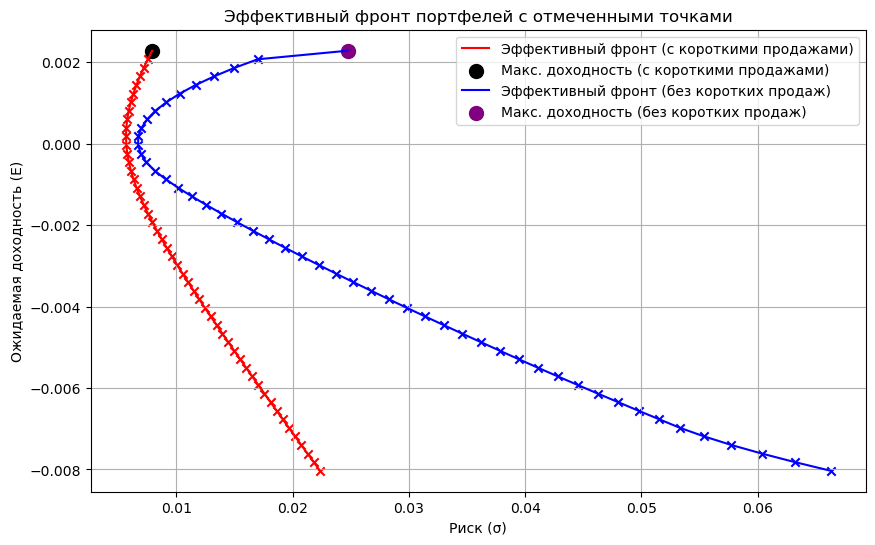

Портфель с равными долями: Риск = 0.01712308771426069 , Ожидаемая доходность = -0.00034977379113724496
Макс. доходность (с короткими продажами): Риск = 0.007915075817505977 , Ожидаемая доходность = 0.00227898871444491
Состав портфеля с максимальной доходностью (с короткими продажами):
[ 0.10310281  0.06488825  0.02256984  0.00930697  0.01597088  0.02879962
  0.05345925  0.02412217  0.00774987  0.12201564  0.13697877  0.09944152
  0.09697073 -0.37698159 -0.08427574  0.09163589  0.01825586  0.06719026
 -0.04065811 -0.10798849 -0.08297368 -0.20104425 -0.37217175  0.12862425
 -0.07287676 -0.07349156  0.07541439 -0.22440705 -0.02419073  0.00173318
 -0.03460774  0.00418212 -0.22271038  0.00447779 -0.02629816  0.04427368
  0.43495558 -0.4716874   0.3783476  -0.11761212  0.01102132  0.50677672
  0.28722281  0.14354272  0.07745775  0.05702679  0.05582918  0.21990523
  0.12115482  0.01957123]
Макс. доходность (без коротких продаж): Риск = 0.02471789106730795 , Ожидаемая доходность = 0.0022789887

In [233]:
num_portfolios = 50
target_returns = np.linspace(expected_returns.min(), expected_returns.max(), num_portfolios)

risk_short = []
returns_short = []
weights_short_list = []

for target_return in target_returns:
    weights_short = cp.Variable(num_assets)
    portfolio_risk_short = cp.quad_form(weights_short, cov_matrix)
    portfolio_return_short = weights_short.T @ expected_returns
    constraints_short = [cp.sum(weights_short) == 1, portfolio_return_short == target_return]
    problem_short = cp.Problem(cp.Minimize(portfolio_risk_short), constraints_short)
    problem_short.solve(solver=cp.SCS)

    risk_short.append(np.sqrt(portfolio_risk_short.value))
    returns_short.append(target_return)
    weights_short_list.append(weights_short.value)

risk_noshort = []
returns_noshort = []
weights_noshort_list = []

for target_return in target_returns:
    weights_noshort = cp.Variable(num_assets)
    portfolio_risk_noshort = cp.quad_form(weights_noshort, cov_matrix)
    portfolio_return_noshort = weights_noshort.T @ expected_returns
    constraints_noshort = [cp.sum(weights_noshort) == 1, weights_noshort >= 0, portfolio_return_noshort == target_return]
    problem_noshort = cp.Problem(cp.Minimize(portfolio_risk_noshort), constraints_noshort)
    problem_noshort.solve(solver=cp.SCS)

    risk_noshort.append(np.sqrt(portfolio_risk_noshort.value))
    returns_noshort.append(target_return)
    weights_noshort_list.append(weights_noshort.value)

max_return_short_idx = np.argmax(returns_short)
max_return_noshort_idx = np.argmax(returns_noshort)

max_risk_short = risk_short[max_return_short_idx]
max_return_short = returns_short[max_return_short_idx]

max_risk_noshort = risk_noshort[max_return_noshort_idx]
max_return_noshort = returns_noshort[max_return_noshort_idx]

weights_max_return_short = weights_short_list[max_return_short_idx]
weights_max_return_noshort = weights_noshort_list[max_return_noshort_idx]

tolerance = 1e-6
weights_max_return_noshort[weights_max_return_noshort < tolerance] = 0

weights_max_return_noshort /= np.sum(weights_max_return_noshort)

def calculate_var(log_returns_pareto, confidence_level=0.95):
    return np.percentile(log_returns_pareto, (1 - confidence_level) * 100)

def calculate_cvar(log_returns_pareto, var):
    return log_returns_pareto[log_returns_pareto <= var].mean()

log_returns_short = np.random.normal(np.dot(weights_max_return_short, expected_returns), 
                                     np.sqrt(np.dot(weights_max_return_short.T, np.dot(cov_matrix, weights_max_return_short))), 
                                     100000)

log_returns_noshort = np.random.normal(np.dot(weights_max_return_noshort, expected_returns), 
                                       np.sqrt(np.dot(weights_max_return_noshort.T, np.dot(cov_matrix, weights_max_return_noshort))), 
                                       100000)

var_short = calculate_var(log_returns_short)
cvar_short = calculate_cvar(log_returns_short, var_short)
print(f"VaR (с короткими продажами) при 95% уровне доверия: {var_short}")
print(f"CVaR (с короткими продажами) при 95% уровне доверия: {cvar_short}")

var_noshort = calculate_var(log_returns_noshort)
cvar_noshort = calculate_cvar(log_returns_noshort, var_noshort)
print(f"VaR (без коротких продаж) при 95% уровне доверия: {var_noshort}")
print(f"CVaR (без коротких продаж) при 95% уровне доверия: {cvar_noshort}")

plt.figure(figsize=(10, 6))

plt.plot(risk_short, returns_short, label='Эффективный фронт (с короткими продажами)', color='red')
plt.scatter(risk_short, returns_short, color='red', marker='x')  # Добавляем точки
plt.scatter(max_risk_short, max_return_short, color='black', marker='o', s=100, label='Макс. доходность (с короткими продажами)')  # Точка максимальной доходности

plt.plot(risk_noshort, returns_noshort, label='Эффективный фронт (без коротких продаж)', color='blue')
plt.scatter(risk_noshort, returns_noshort, color='blue', marker='x')  # Добавляем точки
plt.scatter(max_risk_noshort, max_return_noshort, color='purple', marker='o', s=100, label='Макс. доходность (без коротких продаж)')  # Точка максимальной доходности

plt.title('Эффективный фронт портфелей с отмеченными точками')
plt.xlabel('Риск (σ)')
plt.ylabel('Ожидаемая доходность (E)')
plt.legend()
plt.grid(True)
plt.show()

print("Портфель с равными долями: Риск =", equal_portfolio_risk, ", Ожидаемая доходность =", equal_portfolio_return)
print("Макс. доходность (с короткими продажами): Риск =", max_risk_short, ", Ожидаемая доходность =", max_return_short)
print("Состав портфеля с максимальной доходностью (с короткими продажами):")
print(weights_max_return_short)

print("Макс. доходность (без коротких продаж): Риск =", max_risk_noshort, ", Ожидаемая доходность =", max_return_noshort)
print("Состав портфеля с максимальной доходностью (без коротких продаж):")
print(weights_max_return_noshort)

Как можно заметить ради высокой доходности при возможности коротких продаж мы составляем портфель из всех акций с весами указанными выше. В свою очередь при запрете коротких продаж нет смысла брать все акции, берем только 4 акции: TENR, STMMI, TEN, FIMI - все исключительно с положительными весами. Оптимальный портфель с разрешением коротких продаж предоставляет нам высокую доходность при меньшем уровне риска по сравнению с портфелем без коротких продаж, что наиболее интересно для нас, к тому же Var и CVar гораздо меньше по модулю при разрешении на короткие продажи, что говорит о меньших потерях в случае "плохого сценария". 